In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

import utils

np.set_printoptions(linewidth=200)

In [2]:
RANDOM_SEED = 42

In [3]:
(x_train, y_train), (x_test, y_test) = utils.load_mnist()
x_train_tiny = x_train[:1000]
y_train_tiny = y_train[:1000]
scaler = StandardScaler()
x_train_tiny_scaled = scaler.fit_transform(x_train_tiny.astype(np.float64))

In [4]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED)

In [5]:
cross_val_score(sgd_clf, x_train_tiny, y_train_tiny, cv=3, scoring='accuracy')

array([0.83233533, 0.82882883, 0.79279279])

In [6]:
cross_val_score(sgd_clf, x_train_tiny_scaled, y_train_tiny, cv=3, scoring='accuracy')

array([0.83532934, 0.81681682, 0.82882883])

In [7]:
def plot_mat(mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(mat)
    fig.colorbar(cax)
    plt.show()

In [8]:
y_train_tiny_pred = cross_val_predict(sgd_clf, x_train_tiny_scaled, y_train_tiny, cv=3)
conf_mat = confusion_matrix(y_train_tiny, y_train_tiny_pred)
conf_mat

array([[ 95,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 106,   2,   0,   0,   5,   1,   0,   1,   1],
       [  1,   3,  76,   2,   3,   1,   4,   3,   5,   1],
       [  1,   2,   5,  75,   0,   4,   0,   3,   0,   3],
       [  0,   0,   0,   3,  90,   3,   1,   1,   2,   5],
       [  1,   0,   2,   9,   2,  65,   2,   1,   8,   2],
       [  2,   1,   3,   0,   2,   4,  82,   0,   0,   0],
       [  0,   2,   3,   0,   3,   0,   0, 106,   0,   3],
       [  2,   6,   2,   1,   0,   6,   2,   2,  64,   2],
       [  3,   0,   2,   1,   7,   1,   0,  17,   1,  68]], dtype=int64)

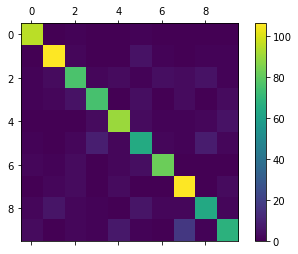

In [9]:
plot_mat(conf_mat)

In [10]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
np.fill_diagonal(norm_conf_mat, 0)
norm_conf_mat

array([[0.        , 0.        , 0.01030928, 0.        , 0.        , 0.01030928, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01724138, 0.        , 0.        , 0.04310345, 0.00862069, 0.        , 0.00862069, 0.00862069],
       [0.01010101, 0.03030303, 0.        , 0.02020202, 0.03030303, 0.01010101, 0.04040404, 0.03030303, 0.05050505, 0.01010101],
       [0.01075269, 0.02150538, 0.05376344, 0.        , 0.        , 0.04301075, 0.        , 0.03225806, 0.        , 0.03225806],
       [0.        , 0.        , 0.        , 0.02857143, 0.        , 0.02857143, 0.00952381, 0.00952381, 0.01904762, 0.04761905],
       [0.01086957, 0.        , 0.02173913, 0.09782609, 0.02173913, 0.        , 0.02173913, 0.01086957, 0.08695652, 0.02173913],
       [0.0212766 , 0.0106383 , 0.03191489, 0.        , 0.0212766 , 0.04255319, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01709402, 0.02564103, 0.        , 0.02564103, 0.        , 0.        , 0.   

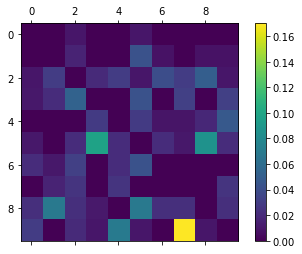

In [11]:
plot_mat(norm_conf_mat)

In [12]:
cl_a, cl_b = '3', '5'
x_aa = x_train_tiny[(y_train_tiny == cl_a) & (y_train_tiny_pred == cl_a)].reshape((-1, 28, 28))
x_ab = x_train_tiny[(y_train_tiny == cl_a) & (y_train_tiny_pred == cl_b)].reshape((-1, 28, 28))
x_ba = x_train_tiny[(y_train_tiny == cl_b) & (y_train_tiny_pred == cl_a)].reshape((-1, 28, 28))
x_bb = x_train_tiny[(y_train_tiny == cl_b) & (y_train_tiny_pred == cl_b)].reshape((-1, 28, 28))

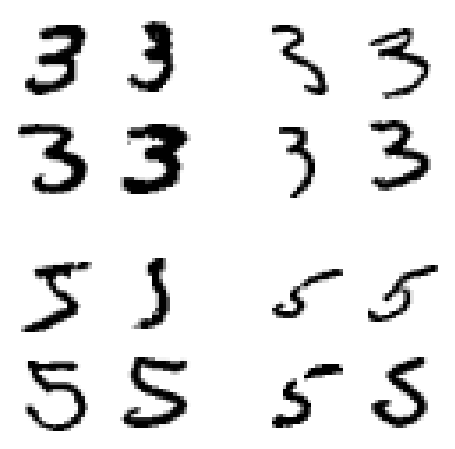

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
utils.plot_digits(x_aa[:4])
plt.subplot(2, 2, 2)
utils.plot_digits(x_ab[:4])
plt.subplot(2, 2, 3)
utils.plot_digits(x_ba[:4])
plt.subplot(2, 2, 4)
utils.plot_digits(x_bb[:4])